<a href="https://colab.research.google.com/github/JavZon/Takrorlash/blob/main/takror_churn2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [2]:

url='https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/E-Commerce-Dataset.csv'
df=pd.read_csv(url)
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [4]:
df.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.221492
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.193869
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,146.000000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.000000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.000000
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,325.000000


In [5]:
df.shape

(5630, 20)

In [6]:
df.isnull().sum()

,0
CustomerID,0
Churn,0
Tenure,264
PreferredLoginDevice,0
CityTier,0
WarehouseToHome,251
PreferredPaymentMode,0
Gender,0
HourSpendOnApp,255
NumberOfDeviceRegistered,0


In [8]:
df['Churn'].value_counts()

,count
Churn,
0,4682
1,948


In [9]:
df['Churn'].value_counts(normalize=True)

,proportion
Churn,
0,0.831616
1,0.168384


PIE

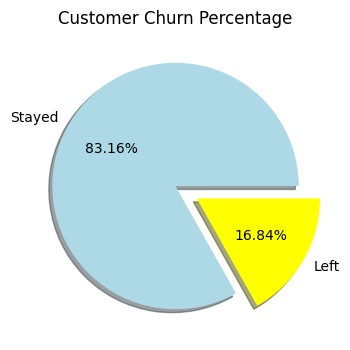

In [10]:
explode = (0, 0.2)
plt.figure(figsize=(4,4))
plt.pie(df['Churn'].value_counts(), labels=['Stayed', 'Left'],explode=explode,autopct='%1.2f%%',colors=('lightblue','yellow'),shadow=True)
plt.title('Customer Churn Percentage')
plt.show()

In [11]:
df.head(3)

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120


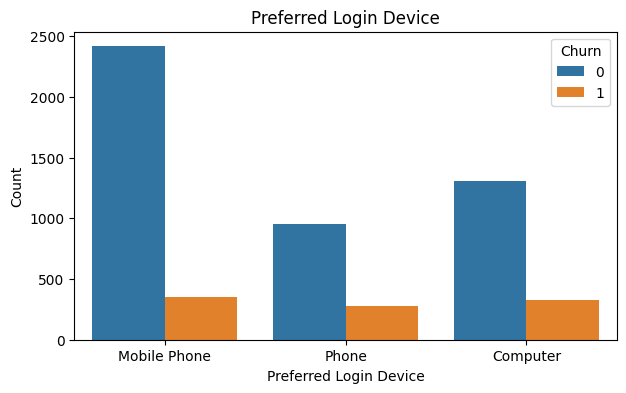

In [12]:
plt.figure(figsize=(7,4))
sns.countplot(x='PreferredLoginDevice',data=df, hue='Churn')
plt.xlabel('Preferred Login Device')
plt.ylabel('Count')
plt.title('Preferred Login Device')
plt.show()

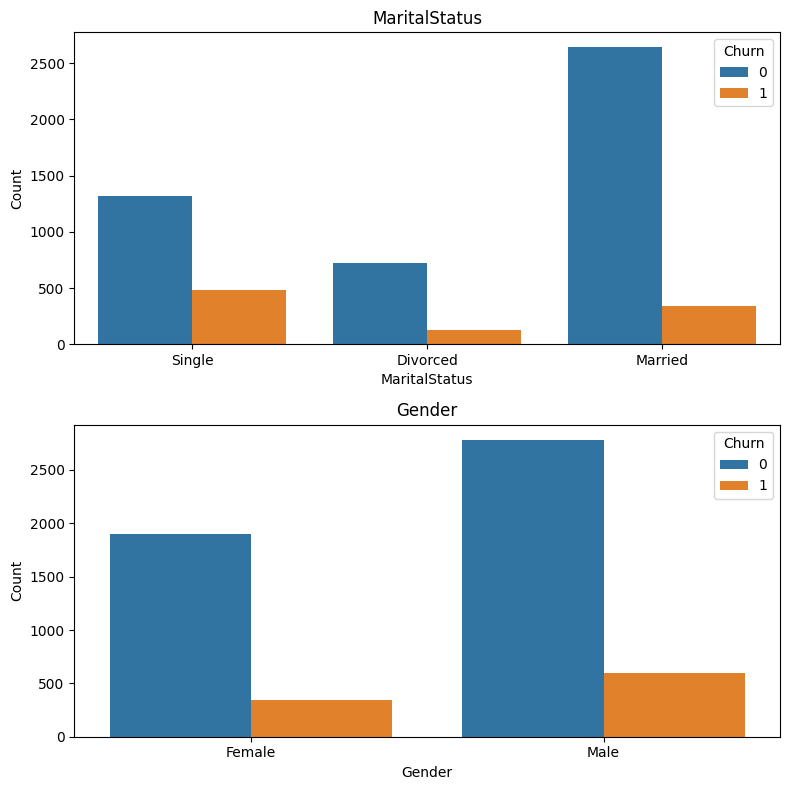

In [13]:
fig,axes=plt.subplots(2,1, figsize=(8,8))
sns.countplot(x='MaritalStatus',data=df,hue='Churn',ax=axes[0])
axes[0].set_xlabel('MaritalStatus')
axes[0].set_ylabel('Count')
axes[0].set_title('MaritalStatus')

sns.countplot(x='Gender', data=df, hue='Churn',ax=axes[1])
axes[1].set_xlabel('Gender')
axes[1].set_ylabel('Count')
axes[1].set_title('Gender')
plt.tight_layout()
plt.show()

In [14]:
df.isnull().sum()

,0
CustomerID,0
Churn,0
Tenure,264
PreferredLoginDevice,0
CityTier,0
WarehouseToHome,251
PreferredPaymentMode,0
Gender,0
HourSpendOnApp,255
NumberOfDeviceRegistered,0


In [15]:
df2=df.drop(columns=['CustomerID','PreferredLoginDevice','PreferredPaymentMode','Gender','PreferedOrderCat','MaritalStatus'])
df2.head()

,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,1,4.0,3,6.0,3.0,3,2,9,1,11.0,1.0,1.0,5.0,160
1,1,NaN,1,8.0,3.0,4,3,7,1,15.0,0.0,1.0,0.0,121
2,1,NaN,1,30.0,2.0,4,3,6,1,14.0,0.0,1.0,3.0,120
3,1,0.0,3,15.0,2.0,4,5,8,0,23.0,0.0,1.0,3.0,134
4,1,0.0,1,12.0,NaN,3,5,3,0,11.0,1.0,1.0,3.0,130


In [16]:
df2.corrwith(df2['Churn']).abs().sort_values(ascending=False)

,0
Churn,1.000000
Tenure,0.349408
Complain,0.250188
DaySinceLastOrder,0.160757
CashbackAmount,0.154161
NumberOfDeviceRegistered,0.107939
SatisfactionScore,0.105481
CityTier,0.084703
WarehouseToHome,0.076630
NumberOfAddress,0.043931


As we see from the correlation table there are only 4 columns that correlated with 'Churn' column 15% or more. So we drop all other columns.

In [17]:
cols=['Tenure','Complain','DaySinceLastOrder','CashbackAmount','Gender','MaritalStatus','PreferredLoginDevice','PreferredPaymentMode','PreferedOrderCat','Churn']
data=df[cols]
data.sample(5)

,Tenure,Complain,DaySinceLastOrder,CashbackAmount,Gender,MaritalStatus,PreferredLoginDevice,PreferredPaymentMode,PreferedOrderCat,Churn
772,30.0,0,5.0,152,Female,Single,Mobile Phone,Debit Card,Laptop & Accessory,0
1983,0.0,0,3.0,143,Male,Married,Phone,E wallet,Laptop & Accessory,0
4673,1.0,1,2.0,135,Male,Single,Phone,Credit Card,Mobile,1
888,3.0,0,2.0,148,Female,Married,Phone,E wallet,Laptop & Accessory,0
3742,4.0,0,1.0,138,Male,Married,Computer,COD,Mobile Phone,0


In [20]:
data.isnull().sum()

,0
Tenure,264
Complain,0
DaySinceLastOrder,307
CashbackAmount,0
Gender,0
MaritalStatus,0
PreferredLoginDevice,0
PreferredPaymentMode,0
PreferedOrderCat,0
Churn,0


In [21]:
mean1=data['Tenure'].mean().round()
mean2=data['DaySinceLastOrder'].mean().round()

data.loc[:,'Tenure']=data['Tenure'].fillna(mean1)
data.loc[:,'DaySinceLastOrder']=data['DaySinceLastOrder'].fillna(mean2)

In [22]:
data.isnull().sum()

,0
Tenure,0
Complain,0
DaySinceLastOrder,0
CashbackAmount,0
Gender,0
MaritalStatus,0
PreferredLoginDevice,0
PreferredPaymentMode,0
PreferedOrderCat,0
Churn,0


Now we encode our columns


In [24]:
data.head(2)

,Tenure,Complain,DaySinceLastOrder,CashbackAmount,Gender,MaritalStatus,PreferredLoginDevice,PreferredPaymentMode,PreferedOrderCat,Churn
0,4.0,1,5.0,160,Female,Single,Mobile Phone,Debit Card,Laptop & Accessory,1
1,10.0,1,0.0,121,Male,Single,Phone,UPI,Mobile,1


In [25]:
encoder=LabelEncoder()

In [27]:
data.loc[:,'Gender']=encoder.fit_transform(data['Gender'])
data.loc[:,'MaritalStatus']=encoder.fit_transform(data['MaritalStatus'])
data.loc[:,'PreferredLoginDevice']=encoder.fit_transform(data['PreferredLoginDevice'])
data.loc[:,'PreferredPaymentMode']=encoder.fit_transform(data['PreferredPaymentMode'])
data.loc[:,'PreferedOrderCat']=encoder.fit_transform(data['PreferedOrderCat'])


In [28]:
data.sample(5)

,Tenure,Complain,DaySinceLastOrder,CashbackAmount,Gender,MaritalStatus,PreferredLoginDevice,PreferredPaymentMode,PreferedOrderCat,Churn
3501,12.0,0,1.0,199,1,2,1,5,0,0
2462,7.0,0,1.0,155,1,1,1,4,2,0
2985,16.0,0,9.0,260,0,0,0,5,1,0
3244,1.0,0,8.0,193,0,2,1,3,2,0
4995,9.0,0,5.0,168,1,2,1,1,4,0


In [30]:
scaler=StandardScaler()

In [31]:
X=data.drop(columns=['Churn'])
y=data['Churn'].copy()

X=scaler.fit_transform(X)

In [32]:
X[2]

array([-0.02166688,  1.58429008, -0.44122927, -1.16328672,  0.81468496,
        1.25189779,  1.50978222,  0.32519139,  0.44665817])

In [33]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2, stratify=y, random_state=42)

In [34]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4504, 9)
(1126, 9)
(4504,)
(1126,)


**ML**

In [35]:
LR_model=LogisticRegression()

LR_model.fit(X_train,y_train)

LogisticRegression()

Predicting and evaluating

In [39]:
y_pred=LR_model.predict(X_test)

Accuracy score - 0.8534635879218473
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       936
           1       0.62      0.34      0.44       190

    accuracy                           0.85      1126
   macro avg       0.75      0.65      0.68      1126
weighted avg       0.83      0.85      0.83      1126



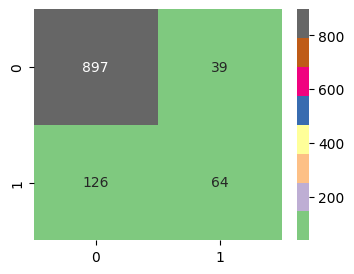

In [40]:
acc_score=accuracy_score(y_test,y_pred)
print('Accuracy score -',acc_score)
clas_rep=classification_report(y_test,y_pred)
print(clas_rep)
conf_mat=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(4,3))
sns.heatmap(conf_mat, annot=True, cmap='Accent', fmt='g')
plt.show()

In [41]:
#KNN

knn_model=KNeighborsClassifier()

knn_model.fit(X_train,y_train)

KNeighborsClassifier()

In [42]:
y_pred=knn_model.predict(X_test)

Accuracy score - 0.8854351687388987
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       936
           1       0.70      0.55      0.62       190

    accuracy                           0.89      1126
   macro avg       0.81      0.75      0.78      1126
weighted avg       0.88      0.89      0.88      1126



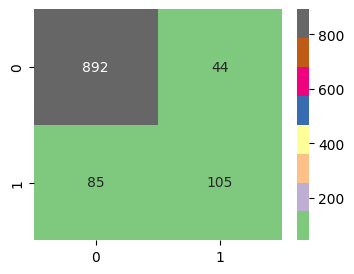

In [43]:
acc_score=accuracy_score(y_test,y_pred)
print('Accuracy score -',acc_score)
clas_rep=classification_report(y_test,y_pred)
print(clas_rep)
conf_mat=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(4,3))
sns.heatmap(conf_mat, annot=True, cmap='Accent', fmt='g')
plt.show()

In [44]:
#RandomForestClassifier
rf_model=RandomForestClassifier()

rf_model.fit(X_train,y_train)

RandomForestClassifier()

In [45]:
y_pred=rf_model.predict(X_test)

Accuracy score - 0.9644760213143873
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       936
           1       0.90      0.88      0.89       190

    accuracy                           0.96      1126
   macro avg       0.94      0.93      0.94      1126
weighted avg       0.96      0.96      0.96      1126



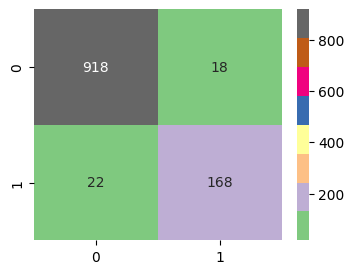

In [46]:
acc_score=accuracy_score(y_test,y_pred)
print('Accuracy score -',acc_score)
clas_rep=classification_report(y_test,y_pred)
print(clas_rep)
conf_mat=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(4,3))
sns.heatmap(conf_mat, annot=True, cmap='Accent', fmt='g')
plt.show()

In [47]:
#Decision Tree

tree_model=DecisionTreeClassifier()

tree_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [48]:
y_pred=tree_model.predict(X_test)

Accuracy score - 0.9618117229129662
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       936
           1       0.87      0.91      0.89       190

    accuracy                           0.96      1126
   macro avg       0.93      0.94      0.93      1126
weighted avg       0.96      0.96      0.96      1126



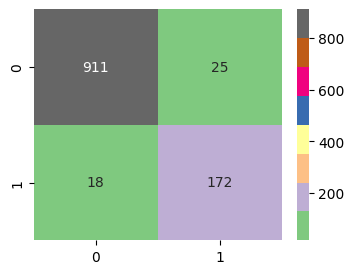

In [49]:
acc_score=accuracy_score(y_test,y_pred)
print('Accuracy score -',acc_score)
clas_rep=classification_report(y_test,y_pred)
print(clas_rep)
conf_mat=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(4,3))
sns.heatmap(conf_mat, annot=True, cmap='Accent', fmt='g')
plt.show()